# Lab 3: Iterative Algorithm Design
## Dominic Zagra, Evan Schubert, Zach Wentz


### Worst Case Run Time Analysis
For this algorithm, our "n" (the input that can change in size) is the number of vertices of a shape. 

In [6]:
def point_inside(vertices, classification_point):
    """Determines if the classification point is in the polygon.
        
        Parameters:
        vertices (Tuple): Vertices of the polygon.
        classification_point (Tuple): 2D point to determine if it's in the polygon.
        
        Returns:
        ret_bool (bool): Whether the classification point is in the polygon or not."""
    num_hits = 0
    classification_x, classification_y = classification_point

    for i in range(len(vertices)):
        vertex_X1, vertex_Y1 = vertices[i]
        vertex_X2, vertex_Y2 = vertices[(i+1) % len(vertices)]

        #what if y's on the vertices are equal?
        #what happens if the classifiction point is on the line of the polygon, answer: it is out of the polygon
        if (classification_y > min(vertex_Y1, vertex_Y2) and classification_y <= max(vertex_Y1, vertex_Y2)):  
            if (vertex_X1 != vertex_X2):
                slope = (vertex_Y2 - vertex_Y1) / (vertex_X2 - vertex_X1)
                intercept = vertex_Y2 - (slope * vertex_X2)
                
                on_line_x = (classification_y - intercept) / slope

            else:
                on_line_x = vertex_X2
                
            if (on_line_x > classification_x):
                    num_hits += 1
            
    if (num_hits % 2 == 0):
        return False
    else:
        return True

In [7]:
def test_algo():
    # testing for a square, with point outside of it
    square_vertices = ((1,1), (1,2), (2,2), (2,1))
    classification_point = ((2,3))
    assert point_inside(square_vertices, classification_point) == False

    # testing for a square, with point inside of it
    classification_point_2 = ((1.5, 1.5))
    assert point_inside(square_vertices, classification_point_2) == True
    
    #testing for a triangle, with point outside of it
    triangle_vertices = ((1,1), (1.5,2), (2,1))
    classification_point_3 = ((1,2))
    assert point_inside(triangle_vertices, classification_point_3) == False

    #testing for a triangle, with point inside of it
    classification_point_4 = ((1.5, 1.5))
    assert point_inside(triangle_vertices, classification_point_4) == True

    #testing for a triangle, with a point (0,1)
    classification_point_5 = ((0,1))
    assert point_inside(triangle_vertices, classification_point_5) == False

    #test
    triangle_vertices = ((1, 1), (1, 3), (2, 2))
    classification_point_6 = ((1.5, 2))
    assert point_inside(triangle_vertices, classification_point_6) == True

    #test point outside upside down pentagon (horizontal line hits lower tip of pentagon)
    pentagon_vertices = ((3, 0), (2, 1), (2, 3), (4, 3), (4, 1))
    classification_point_7 = ((0, 0))
    assert point_inside(pentagon_vertices, classification_point_7) == False


    shape_vertices = ((1, 1), (1, 4), (6, 4), (6, 3), (4, 3), (2, 1))
    classification_point_8 = ((3, 3))
    assert point_inside(shape_vertices, classification_point_8) == True


In [8]:
test_algo()

Number of hits: 0
Number of hits: 1
Number of hits: 2
Number of hits: 1
Number of hits: 0
Number of hits: 1
Number of hits: 0
Number of hits: 1


## Test Cases


| Test Case                               | Expected Answer     | Algo Returned Answer |
| ------------------------------------------------ | ------------------- | -------------------- |
| <img src="TestCase1.png" width="250" height="200">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase2.png" width="250" height="200">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase3.png" width="250" height="200">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase4.png" width="250" height="200">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase5.png" width="250" height="200">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase6.png" width="250">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase7.png" width="250" height="200">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase8.png" width="250" height="200">            | True (Point in polygon)| True (Point in polygon)                |



## Benchmarking

In [3]:
pip install shapely

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.4 MB 3.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 5.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


The following cell contains functions that are needed for benchmarking. It generates vertices for a polygon and a classification point.

In [15]:
from shapely import Point
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
import time
import random

def generate_polygon(center_x, center_y, radius, n_sides):
    polygon = Point(center_x, center_y).buffer(radius, n_sides)
    return list(polygon.exterior.coords)

def midpoint(vertex1, vertex2):
    return ((vertex1[0] + vertex2[0]) / 2, (vertex1[1] + vertex2[1]) / 2)


def generate_classification_point(vertices):
    choice = random.choice(['inside', 'outside', 'edge'])
    
    if choice == 'inside':
        return midpoint(vertices[0], vertices[1])
    
    elif choice == 'outside':
        return (vertices[0][0] + 100 , vertices[0][1] + 100)
    
    elif choice == 'edge':
        return midpoint(vertices[1], vertices[2])

def benchmarker(center_x, center_y, radius, n_sides):
    vertices = generate_polygon(center_x, center_y, radius, n_sides) #generate polygon with n sides
    classification_point = generate_classification_point(vertices)
    start_time = time.perf_counter()
    result = point_inside(vertices, classification_point)
    end_time = time.perf_counter()

    return end_time - start_time



In [21]:
times = []
center_x, center_y = 0, 0
radius = 10

times = [benchmarker(center_x, center_y, radius, n) for n in range(3,2001)]



Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 1
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 1
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 1
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 0
Number of hits: 1
Number of hits: 0
Number of 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0006921000313013792, 3.100000321865082e-05, 2.6900088414549828e-05, 1.9600032828748226e-05, 1.9299914129078388e-05, 2.329994458705187e-05, 2.859998494386673e-05, 2.5000073947012424e-05, 2.6400084607303143e-05, 1.5400000847876072e-05, 1.5600002370774746e-05, 1.9099912606179714e-05, 1.7300015315413475e-05, 1.7900019884109497e-05, 2.780009526759386e-05, 3.6899931728839874e-05, 3.220001235604286e-05, 3.350002225488424e-05, 3.879994619637728e-05, 4.169996827840805e-05, 3.499991726130247e-05, 3.599992487579584e-05, 4.329998046159744e-05, 3.809994086623192e-05, 0.00011390005238354206, 2.9199989512562752e-05, 3.0099996365606785e-05, 2.859998494386673e-05, 2.9099988751113415e-05, 2.9099988751113415e-05, 3.5899924114346504e-05, 3.8899946957826614e-05, 3.290001768618822e-05, 3.260001540184021e-05, 7.349997758865356e-05, 8.860009256750345e-05, 6.710004527121782e-05, 3.8199941627681255e-05, 8.470006287097931e-05, 4.789989907294512e-05, 4.20999713242054e-05, 4.060007631778717e-05, 4.9300026148557

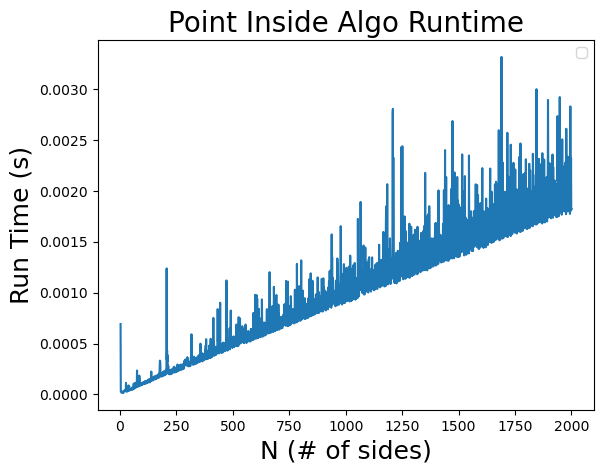

In [22]:
n = list(range(3,2001))
plt.plot(n, times)
plt.xlabel("N (# of vertices)", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Point Inside Algo Runtime", fontsize=20)
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()